# Sprint 7

## Problem 1, 3, 4, 5 and 6

In [95]:
#Dataset for clustering
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [96]:
import numpy as np
n_clusters = 4
a = range(X.shape[0])
np.random.seed(0)
first_point = np.random.choice(a, n_clusters, replace=False)
init = X[first_point,:]

In [97]:
init

array([[-0.565433  ,  3.65813966],
       [ 1.60161834,  0.92363636],
       [ 1.35678894,  4.36462484],
       [-1.26041884,  7.46644456]])

In [98]:
def obtain_SSE(X=X):
    dist = np.zeros((X.shape[0], n_clusters))
    for l in range(n_clusters):
        d_a = abs(X - init[l,:])
        d_a2 = d_a ** 2
        d_a3 = np.sum(d_a2, axis=1)
        dist[:,l] = d_a3 
    SSE = 0
    clster = np.argmin(dist,axis=1)
    print(clster)
    for i in range(n_clusters):
        SSE += np.sum(np.min(dist[clster==i],axis=1))
        init[i,:] = np.mean(X[clster==i], axis=0)
    return dist, SSE, init

In [99]:
d, sse, init = obtain_SSE()
print(init)

[2 3 2 2 2 2 0 3 2 3 3 3 3 3 3 1 1 0 0 1 2 3 0 1 2 0 0 2 1 1 1 3 1 1 0 2 3
 1 3 0 2 0 3 0 0 3 1 0 2 0 2 1 0 0 0 3 3 1 1 3 3 1 1 2 1 3 0 0 1 2 3 1 2 3
 2 2 0 0 1 1 1 3 0 0 1 0 1 1 2 2 2 0 0 0 0 3 3 0 3 0]
[[-1.24587768  3.22980708]
 [ 1.99186903  0.96561071]
 [ 1.06148307  4.39922699]
 [-1.26811733  7.76378266]]


In [100]:
d, sse, dist = obtain_SSE()
print(d[:10])
print(sse)

[2 3 2 2 2 2 0 3 2 3 3 3 3 3 3 1 1 0 0 1 2 3 0 1 2 0 0 2 1 1 1 3 1 1 0 2 3
 1 3 0 2 0 3 0 0 3 1 0 2 2 2 1 0 0 0 3 3 1 1 3 3 1 1 2 1 3 0 0 1 2 3 1 2 3
 2 2 0 0 1 1 1 3 0 2 1 0 1 1 2 2 2 0 2 0 0 3 3 0 3 2]
[[4.10201765e+00 9.16618233e+00 5.86279912e-01 2.03610833e+01]
 [2.28807616e+01 6.41525540e+01 2.14821006e+01 4.34694272e-01]
 [8.06168487e+00 1.19566237e+01 8.84028654e-02 1.84444068e+01]
 [6.88358328e+00 1.33216271e+01 8.82864579e-03 1.60899179e+01]
 [1.08564272e+01 1.56789718e+01 5.36611623e-01 1.63496959e+01]
 [4.96636188e+00 1.16194454e+01 1.38579186e-01 1.72458494e+01]
 [9.20017779e-01 2.40500656e+01 9.39136514e+00 1.56141249e+01]
 [2.18402837e+01 5.54457264e+01 1.54777896e+01 2.57930809e-01]
 [6.07410465e+00 2.20990040e+01 1.65480569e+00 8.10885807e+00]
 [2.01588246e+01 5.72933340e+01 1.72211414e+01 2.94409388e-02]]
50.912773104155825


In [101]:
cluster = np.argmin(d,axis=1)
cluster

array([2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 3,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 3, 1, 3, 0, 2, 0, 3, 0,
       0, 3, 1, 0, 2, 2, 2, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 3,
       0, 0, 1, 2, 3, 1, 2, 3, 2, 2, 0, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 2, 0, 0, 3, 3, 0, 3, 2])

In [102]:
class ScratchKMeans():

    def __init__(self, n_clusters, max_iter, verbose=False, tol=5, seed=0):  #n_init,  tol,
        self.n_clusters = n_clusters
        self.seed = seed
        self.max_iter = max_iter
        self.tol= tol
        self.verbose = verbose



    def fit(self, X):
        self.a = range(X.shape[0])
        np.random.seed(self.seed)
        self.first_point = np.random.choice(self.a, self.n_clusters, replace=False)
        self.first_co = X[self.first_point,:] 
        self.new_co = np.zeros((self.n_clusters, X.shape[1]))
        self.SSE_Rec = []
        
        for i in range(self.max_iter):        
            self.dist = np.zeros((X.shape[0], self.n_clusters))
            self.yk =  np.zeros((X.shape[0], self.n_clusters))
            
            for l in range(self.n_clusters):
                self.d_a = abs(X - self.first_co[l,:])
                self.d_a2 = self.d_a ** 2
                self.d_a3 = np.sum(self.d_a2, axis=1) 
                self.dist[:,l] = self.d_a3
                for j in range(X.shape[0]):
                    self.yk[j,l] = np.linalg.norm(X[j,:] - self.first_co[l,:]) 
                
            self.SSE = 0 
            self.clster = np.argmin(self.yk, axis=1)
        
            for i in range(self.n_clusters):
                self.SSE += np.sum(np.min(self.dist[self.clster==i],axis=1))
                self.first_co[i,:] = np.mean(X[self.clster==i],axis=0)
  
            if np.mean(np.sqrt(np.sum(abs(self.first_co**2 - self.new_co**2), axis=1))) <= self.tol: 
                break
                
            if (self.first_co == self.new_co).all == True:
                break
            else:
                self.new_co = np.copy(self.first_co)
            self.SSE_Rec.append(self.SSE)
            
        if self.verbose:
            print(self.SSE_Rec)
  
        return self.clster

    def predict(self, X):
        self.pre_dist = np.zeros((X.shape[0], self.n_clusters))
        for l in range(self.n_clusters):
            for j in range(X.shape[0]):
                self.pre_dist[j,l] = np.linalg.norm(X[j,:] - self.new_co[l,:])     
        self.pre_clster = np.argmin(self.pre_dist,axis=1)
        return self.pre_clster

In [103]:
KM = ScratchKMeans(n_clusters = 4, max_iter = 10, verbose=True, tol=0.05)
KM.fit(X)

[84.33640249455568, 50.912773104155825]


array([2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 3,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 3, 1, 3, 0, 2, 0, 3, 0,
       0, 3, 1, 0, 2, 2, 2, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 3,
       0, 0, 1, 2, 3, 1, 2, 3, 2, 2, 0, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 2, 0, 0, 3, 3, 0, 3, 2])

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


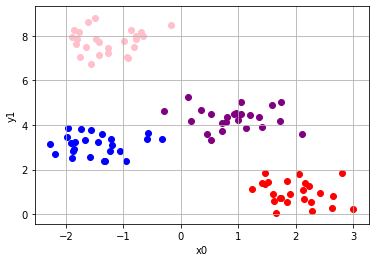

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
cl = KM.predict(X)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X[:,0][cl==0], X[:,1][cl==0], c='blue')
ax.scatter(X[:,0][cl==1], X[:,1][cl==1], c='red')
ax.scatter(X[:,0][cl==2], X[:,1][cl==2], c='purple')
ax.scatter(X[:,0][cl==3], X[:,1][cl==3], c='pink')

ax.set_xlabel('x0')
ax.set_ylabel('y1')
ax.grid(True)

fig.show()

In [105]:
KM = ScratchKMeans(n_clusters = 3, max_iter = 10, verbose=True, tol=0, seed=1)
KM.fit(X)

[1764.6038326746107, 437.43951195640506, 420.2195283854711, 418.8543089744332, 418.2109500143536, 417.41642585641245, 417.30340405266253, 416.6369660273467, 408.877920866098, 383.2642982799094]


array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2])

## Problem 7

In [106]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, _, test_size=0.3, random_state=0)
KM = ScratchKMeans(n_clusters = 4, max_iter = 15, verbose=True, tol=0, seed=1)
KM.fit(X_train)

[445.34442338044715, 150.94139280748257, 133.768643548361, 57.09421170745124]


array([0, 2, 1, 2, 2, 1, 3, 0, 1, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 1, 3, 0,
       1, 3, 2, 1, 0, 1, 2, 3, 0, 0, 3, 2, 2, 3, 2, 2, 0, 1, 2, 2, 1, 3,
       0, 1, 1, 3, 1, 3, 3, 2, 0, 2, 3, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       3, 2, 3, 3])

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


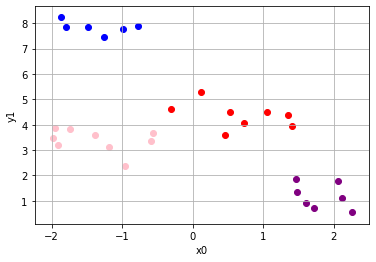

In [107]:
cl = KM.predict(X_test)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X_test[:,0][cl==0], X_test[:,1][cl==0], c='blue')
ax.scatter(X_test[:,0][cl==1], X_test[:,1][cl==1], c='red')
ax.scatter(X_test[:,0][cl==2], X_test[:,1][cl==2], c='purple')
ax.scatter(X_test[:,0][cl==3], X_test[:,1][cl==3], c='pink')

ax.set_xlabel('x0')
ax.set_ylabel('y1')
ax.grid(True)

fig.show()

## Problem 8

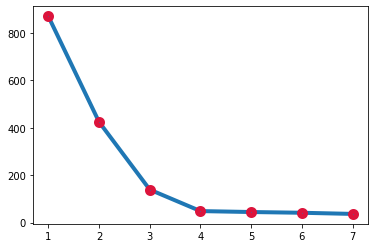

In [108]:
sse = []
n_cl = []
for i in range(1,8):
    n_cl.append(i)
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(X)
    sse.append(KM.SSE)
plt.plot(n_cl, sse, marker="o", markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth=4)

## Problem 10

In [109]:
import pandas as pd
Wholesale = pd.read_csv('Wholesale customers data.csv')
Wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [110]:
idx = np.array([0,1])
Wholesale2 = Wholesale.drop(["Channel", "Region"], axis=1)

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Wholesale_std = sc.fit_transform(Wholesale2)

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(Wholesale_std)
Wholesale_pca = pca.transform(Wholesale_std)

[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


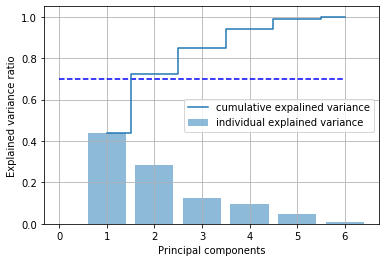

In [113]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(Wholesale_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

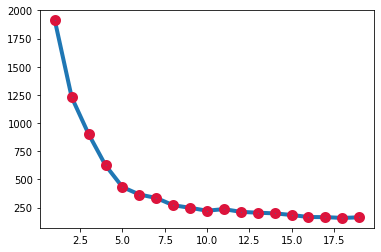

In [114]:
sse = []
n_cl = []
for i in range(1,20):
    n_cl.append(i)
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca)
    sse.append(KM.SSE)
plt.plot(n_cl, sse, marker="o", markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth=4)

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


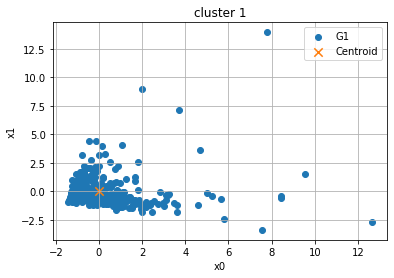

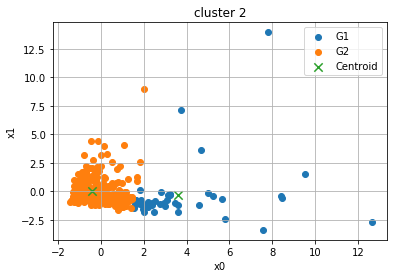

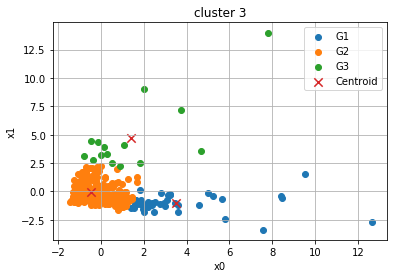

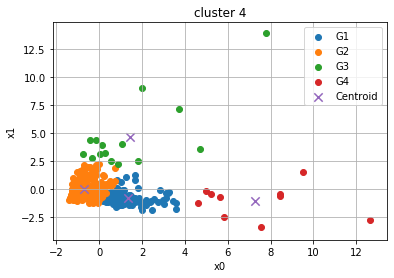

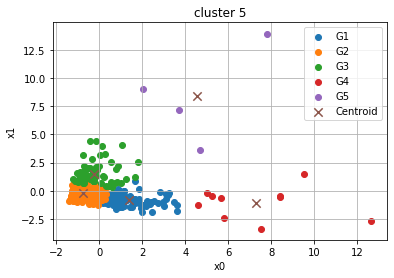

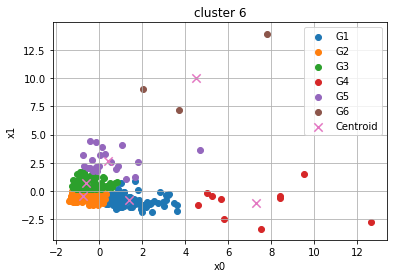

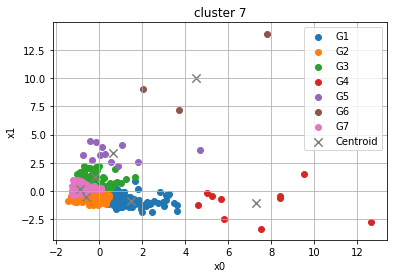

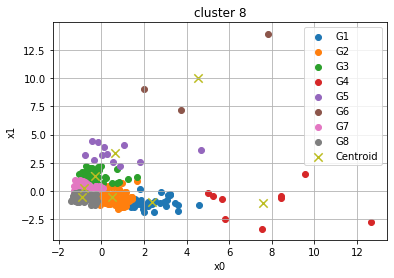

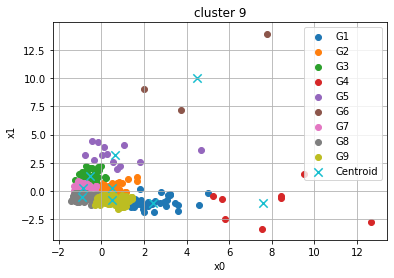

In [115]:
KM = ScratchKMeans(n_clusters = 10, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)
for i in range(1,10):
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca)
    cl = KM.predict(Wholesale_pca)
    
    fig = plt.figure()

    ax = fig.add_subplot(1,1,1)
    for i in range(np.unique(cl).shape[0]):
        ax.scatter(Wholesale_pca[:,0][cl==i], Wholesale_pca[:,1][cl==i], label='G{}'.format(i+1))
    ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_title('cluster {}'.format(i+1))
    ax.grid(True)

    ax.legend(loc='upper right')
    fig.show()

- We see from the above graphs that From cluster 5, the SSE is smaller. The optimum is obtain from cluster 5.

## Problem 11

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


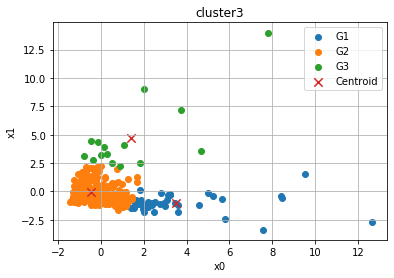

In [116]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 3, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca) 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(3):
    ax.scatter(Wholesale_pca[:,0][cl==i], Wholesale_pca[:,1][cl==i], label='G{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)
ax.legend(loc='upper right')

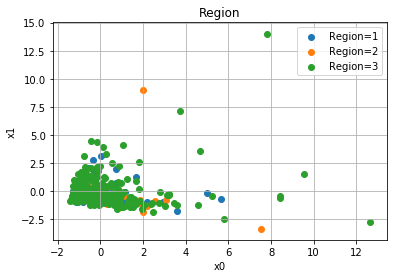

In [117]:
Wholesale["Region"].unique()
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 1], Wholesale_pca[:,1][Wholesale["Region"] == 1], label = "Region=1")
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 2], Wholesale_pca[:,1][Wholesale["Region"] == 2], label = "Region=2")
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 3], Wholesale_pca[:,1][Wholesale["Region"] == 3], label = "Region=3")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Region')
plt.grid(True)

plt.legend(loc='upper right')

- We have a difference between the classification by region and the one by K-means. In fact, we have overlappiong of regions between categories.

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


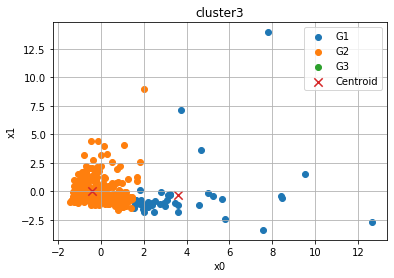

In [118]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(3):
    ax.scatter(Wholesale_pca[:,0][cl==i], Wholesale_pca[:,1][cl==i], label='G{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)
ax.legend(loc='upper right')

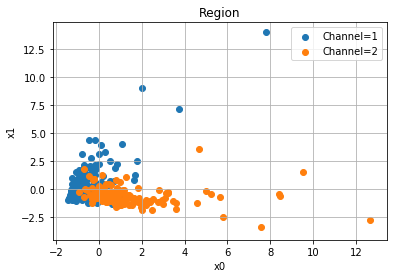

In [119]:
Wholesale["Channel"].unique()
plt.scatter(Wholesale_pca[:,0][Wholesale["Channel"] == 1], Wholesale_pca[:,1][Wholesale["Channel"] == 1], label = "Channel=1")
plt.scatter(Wholesale_pca[:,0][Wholesale["Channel"] == 2], Wholesale_pca[:,1][Wholesale["Channel"] == 2], label = "Channel=2")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Region')
plt.grid(True)

plt.legend(loc='upper right')

- Classification by channel and the one by Region are also different here but we have less overlapping.

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


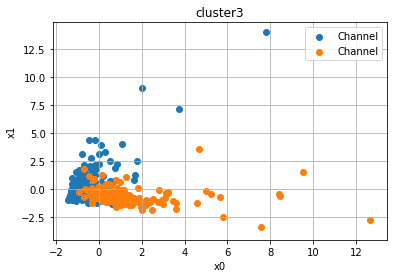

In [120]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)
fig = plt.figure()
Channel = np.array(Wholesale["Channel"])
ax = fig.add_subplot(1,1,1)
for i in range(1,3):
    ax.scatter(Wholesale_pca[:,0][Wholesale["Channel"]==i], Wholesale_pca[:,1][Wholesale["Channel"]==i], label='Channel')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


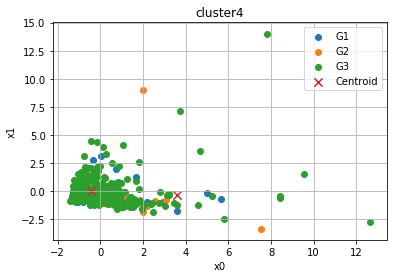

In [121]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)
fig = plt.figure()
Region = np.array(Wholesale["Region"])
ax = fig.add_subplot(1,1,1)
for i in range(1,4):
    ax.scatter(Wholesale_pca[:,0][Region==i], Wholesale_pca[:,1][Region==i], label='G{}'.format(i))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')    
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

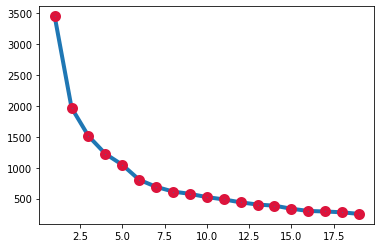

In [122]:
Wholesale_log = np.log(Wholesale2)
for i in Wholesale2.columns:
    Wholesale_log[i] == np.log(Wholesale2[i])
    
pca = PCA(n_components = 2)
pca = pca.fit(Wholesale_log)
Wholesale_pca_log = pca.transform(Wholesale_log)

sse = []
n_cl = []
for i in range(1,20):
    n_cl.append(i)
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca_log)
    sse.append(KM.SSE)
plt.plot(n_cl, sse, marker="o", markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth=4)

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


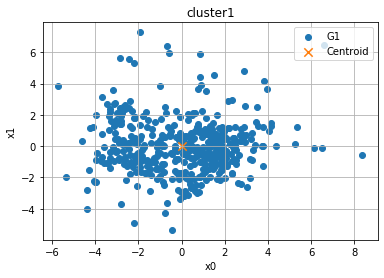

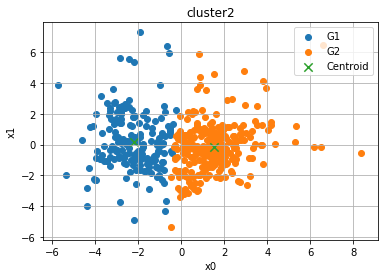

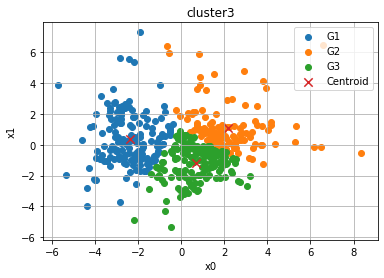

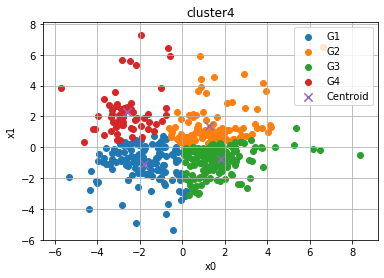

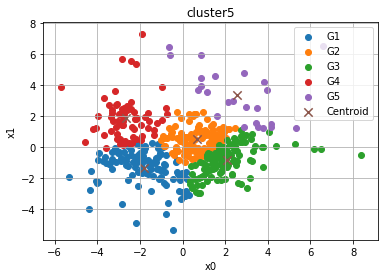

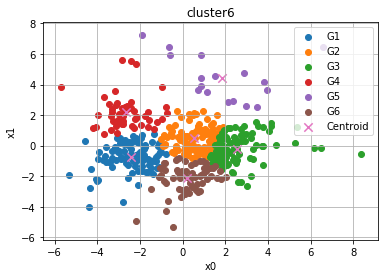

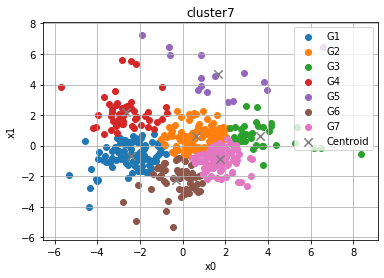

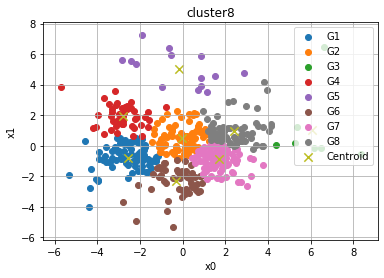

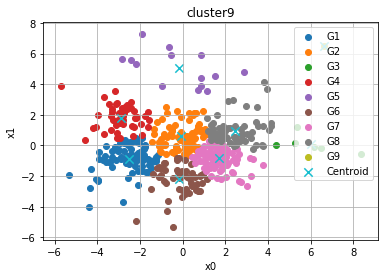

In [123]:
for i in range(1,10):
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca_log)
    cl = KM.predict(Wholesale_pca_log)
    
    fig = plt.figure()

    ax = fig.add_subplot(1,1,1)
    for i in range(np.unique(cl).shape[0]):
        ax.scatter(Wholesale_pca_log[:,0][cl==i], Wholesale_pca_log[:,1][cl==i], label='G{}'.format(i+1))
    ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_title('cluster{}'.format(i+1))
    ax.grid(True)

    ax.legend(loc='upper right')
    fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


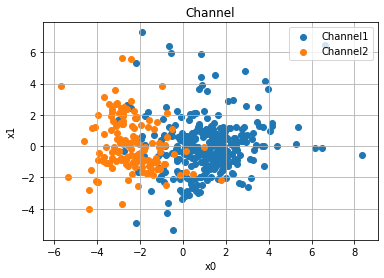

In [124]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca_log)
cl = KM.predict(Wholesale_pca_log)
fig = plt.figure()
Channel = np.array(Wholesale["Channel"])
ax = fig.add_subplot(1,1,1)
for i in range(1,3):
    ax.scatter(Wholesale_pca_log[:,0][Channel==i], Wholesale_pca_log[:,1][Channel==i], label='Channel{}'.format(i))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title("Channel")
ax.grid(True)

ax.legend(loc='upper right')

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


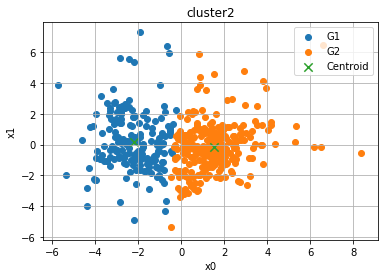

In [125]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca_log)
cl = KM.predict(Wholesale_pca_log)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(2):
    ax.scatter(Wholesale_pca_log[:,0][cl==i], Wholesale_pca_log[:,1][cl==i], label='G{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

In [126]:
Wholesale2["cluster"] = cl
Wholesale2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0


/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


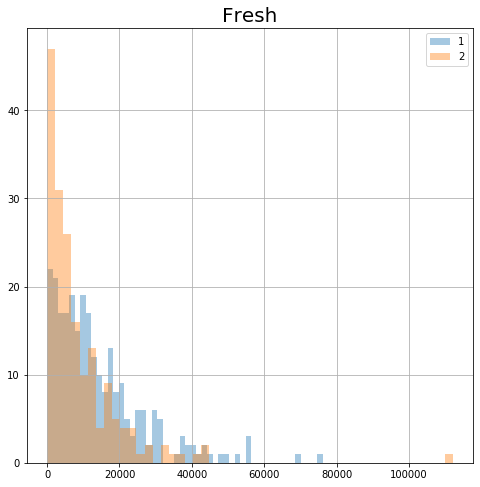

In [127]:
Wholesale_cl1 = Wholesale[Wholesale2["cluster"] == 1]
Wholesale_cl0 = Wholesale[Wholesale2["cluster"] == 0]
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl1["Fresh"],bins=50,alpha=0.4, label = "1")
ax1.hist(Wholesale_cl0["Fresh"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Fresh',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


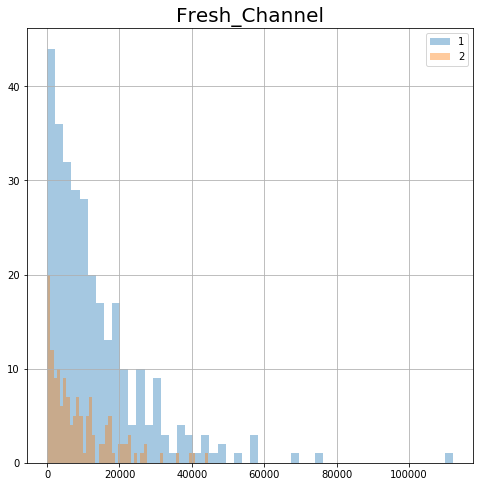

In [128]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Fresh"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Fresh"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Fresh_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


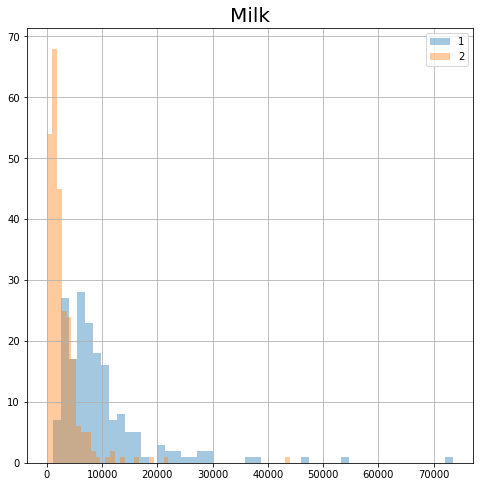

In [129]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Milk"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Milk"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Milk',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


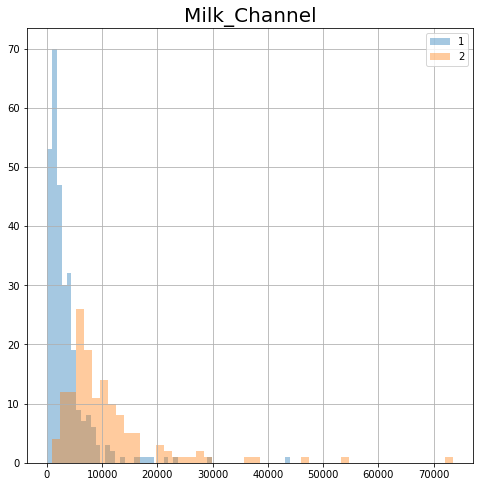

In [130]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Milk"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Milk"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Milk_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


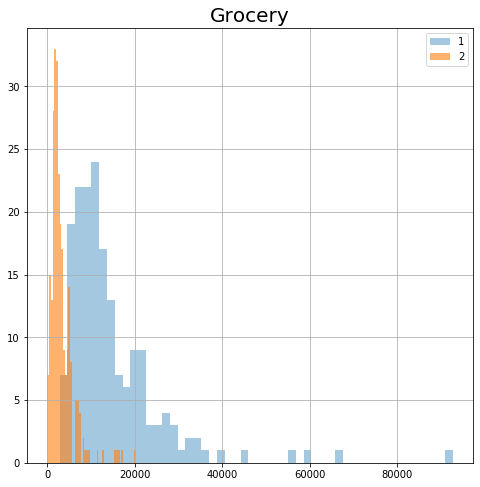

In [131]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Grocery"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Grocery"],bins=50, alpha=0.6, label = "2")
ax1.set_title('Grocery',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


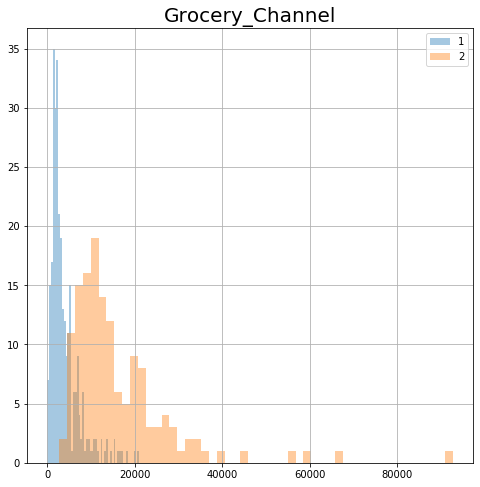

In [132]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Grocery"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Grocery"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Grocery_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


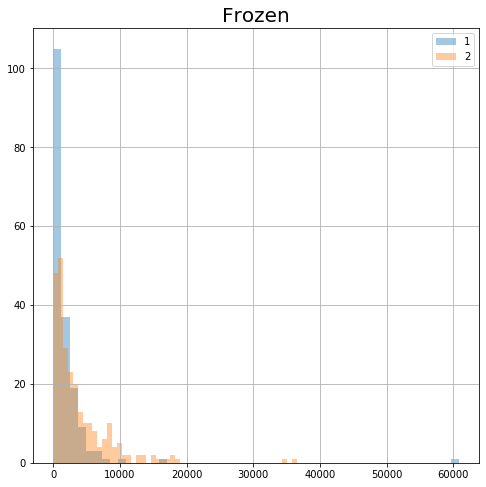

In [133]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Frozen"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Frozen"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Frozen',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


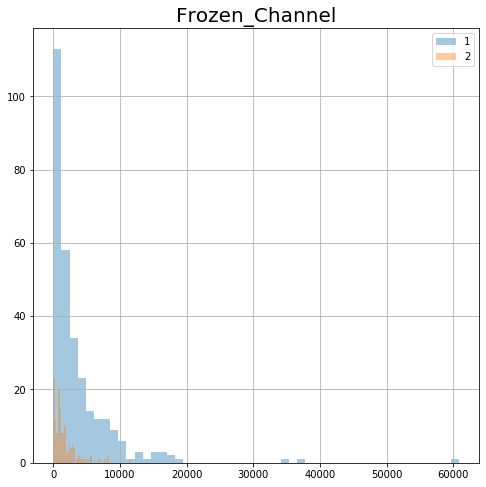

In [134]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Frozen"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Frozen"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Frozen_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


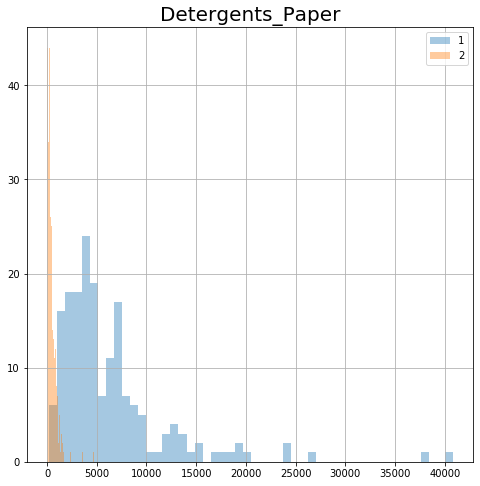

In [135]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Detergents_Paper"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Detergents_Paper"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Detergents_Paper',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


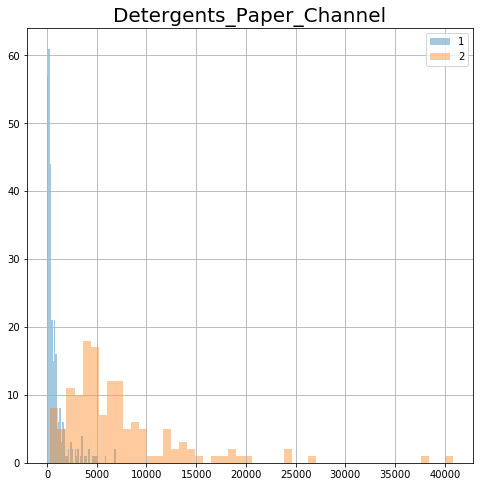

In [136]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Detergents_Paper"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Detergents_Paper"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Detergents_Paper_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


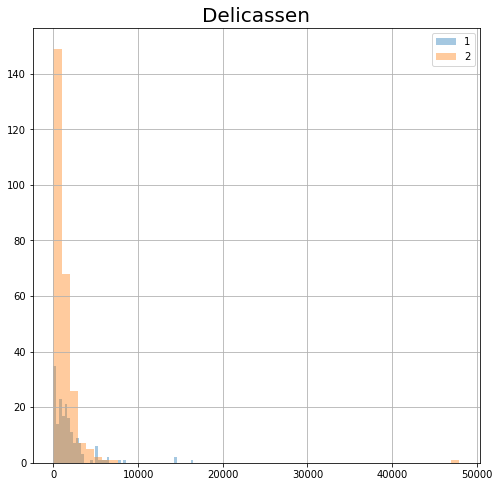

In [137]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Delicassen"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Delicassen"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Delicassen',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

/Users/diopmouhamed/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


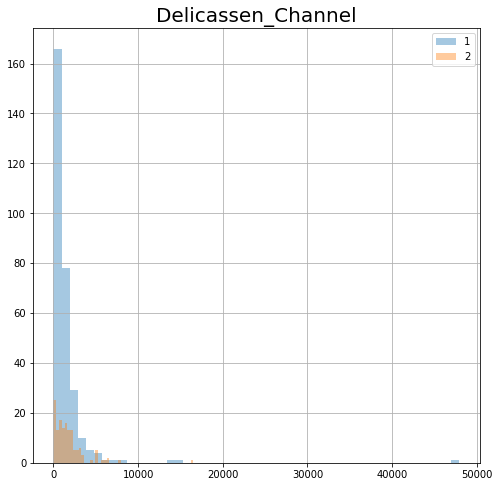

In [138]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Delicassen"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Delicassen"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Delicassen_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

## Problem 12

In [148]:
Wholesale2 = pd.read_csv('Wholesale customers data.csv')
Wholesale3 = Wholesale2.drop(["Channel", "Region"], axis=1)
Wholesale3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [149]:
import pandas as pd
KM = ScratchKMeans(n_clusters = 5, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)
data_cl0 = Wholesale3[cl==0]
data_cl1 = Wholesale3[cl==1]
data_cl2 = Wholesale3[cl==2]
data_cl3 = Wholesale3[cl==3]
data_cl4 = Wholesale3[cl==4]
cl_data=pd.DataFrame(cl)
cl_data = cl_data.rename(columns={0: "cluster"})
Wholesale_add_cl= pd.concat([Wholesale3, cl_data], axis=1)

#groupby
Wholesale_mean_cl = Wholesale_add_cl.groupby("cluster").mean()

In [150]:
Wholesale_mean_cl.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,5282.846154,10403.164835,16838.901099,1266.384615,7436.967033,1505.923077
1,9148.992337,2866.084291,3816.011494,2036.333333,996.831418,930.072797
2,27618.486486,5158.810811,5552.851351,7501.054054,964.486486,2474.351351
3,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
4,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000


- Let's now distribute the ressources 

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

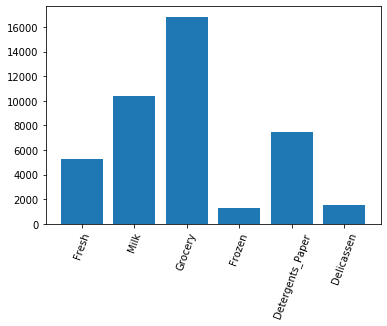

In [151]:
height = np.array(Wholesale_mean_cl.iloc[0])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

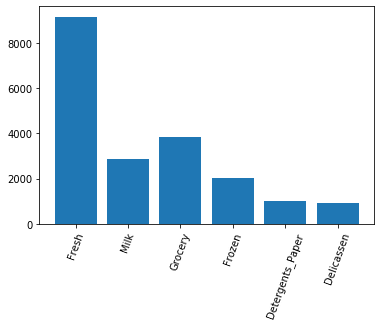

In [152]:
height = np.array(Wholesale_mean_cl.iloc[1])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

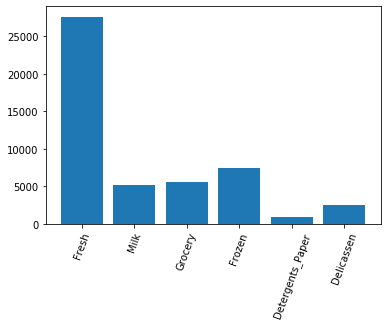

In [153]:
height = np.array(Wholesale_mean_cl.iloc[2])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

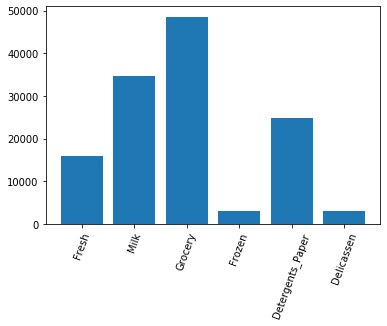

In [157]:
height = np.array(Wholesale_mean_cl.iloc[3])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

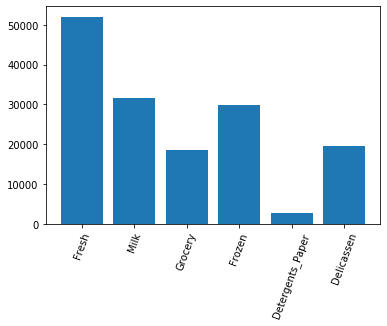

In [158]:
height = np.array(Wholesale_mean_cl.iloc[4])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

From the above distribution and the previous results, we see that Cluster 0 in term of price is higher (when we sum up the different prices). Clients in Cluster 1 have the highest for the Fresh. As for Cluster 4, Fresh, Milk and Frozen come in that order for highest purchases.